### Cargar librerias y establecer variables

In [58]:
# Librerias a utilizar en el EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt
from datetime import datetime

In [61]:
# Se utiliza un rango de 50 años para la extraccion de datos económicos
timeframe = 365*50
today = datetime.today()
end = today.strftime("%Y-%m-%d")
# start = (today - dt.timedelta(days=timeframe)).strftime("%Y-%m-%d")

# Se utiliza un rango de 23 años para la extraccion de datos bursátiles
stock_timeframe = 365*23
stock_start = (today - dt.timedelta(days=stock_timeframe)).strftime("%Y-%m-%d")
stock_end = end

### Cargando los Datos de 'raw'

In [116]:
# Extraer datos de la carpeta 'raw'
df_indicators = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\raw\indicators_df.csv',index_col=0, header=0)
df_markets = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\raw\market_hist.csv',index_col=0, header=0)

### Limpiar Datos de Mercados Bursátiles

In [173]:
# Filtrar los datos de mercado de los primeros 23 años
df_markets = df_markets.loc[stock_start:stock_end]

# Crear DataFrame de rendimiento diario de mercados
df_market_rets = df_markets.pct_change().fillna(0)

# Crear DataFrame de rendimiento acumulado de mercados
df_market_cum = df_market_rets.cumsum().fillna(0)

In [174]:
# Guardar tablas de mercados
df_markets.to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\market_hist.csv")
df_market_rets.to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\market_rets.csv")
df_market_cum.to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\market_cum.csv")

### Limpiar Datos Económicos

In [129]:
df_indicators = df_indicators.loc[stock_start:stock_end]

In [130]:
# Rellenar los datos vacios con el dato anterior
df_indicators_limpio = df_indicators.fillna(method='ffill')

# Rellenar los siguientes datos vacios con el ultimo dato
df_indicators_limpio.fillna(method='bfill', inplace=True) 

In [131]:
df_indicators_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5996 entries, 2000-04-17 to 2023-04-10
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   10-Year Treasury Yield        5996 non-null   float64
 1   2-Year Treasury Yield         5996 non-null   float64
 2   Federal Funds Effective Rate  5996 non-null   float64
 3   1-Month Treasury Yield        5996 non-null   float64
 4   3-Month Treasury Yield        5996 non-null   float64
 5   5-Year Treasury Yield         5996 non-null   float64
 6   20-Year Treasury Yield        5996 non-null   float64
 7   30-Year Treasury Yield        5996 non-null   float64
 8   15-Year Mortgage Rate         5996 non-null   float64
 9   30-Year Mortgage Rate         5996 non-null   float64
 10  Unemployment Rate             5996 non-null   float64
 11  GDP                           5996 non-null   float64
 12  GDP Growth                    5996 non-null   float6

In [172]:
# Listar los indicadores por su tipo
irates = ["1-Month Treasury Yield",
          "3-Month Treasury Yield",
          "2-Year Treasury Yield",
          "5-Year Treasury Yield",
          "10-Year Treasury Yield",
          "20-Year Treasury Yield",
          "30-Year Treasury Yield",
          "15-Year Mortgage Rate",
          "30-Year Mortgage Rate"]
irate_yld = ["3m5y",
             "3m10y",
             "2y10y",
             "2y20y",
             "5y10y",
             "10y30y",
             "10yTrea30yFRM"]
inflation = ["CPI",
             "Inflation rate",
             "PPI",
             "PPI rate"] 
usd = ["US Dollar Index"] 
gdp = ["GDP",
       "GDP Growth",
       "Real GDP",
       "RGDP Growth",]
unemployment = ["Unemployment Rate"]

# Agrupar las listas de indicadores en un diccionario
indicator_dict = {"interest_rates":irates,
                  "interest_rate_yld":irate_yld,
                  "inflation":inflation,
                  "usd":usd,
                  "gdp":gdp,
                  "unemployment":unemployment}

# Guardar las tablas de indicadores en csv
for ind_name, ind_list in indicator_dict.items():
    df_indicators[ind_list].dropna().to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\{0}.csv".format(ind_name))

In [142]:
# Crear y guardar tabla de interest_rates.csv

irates = ["1-Month Treasury Yield",
          "3-Month Treasury Yield",
          "2-Year Treasury Yield",
          "5-Year Treasury Yield",
          "10-Year Treasury Yield",
          "20-Year Treasury Yield",
          "30-Year Treasury Yield",
          "15-Year Mortgage Rate",
          "30-Year Mortgage Rate"]
df_irates = df_indicators_limpio[irates]

df_irates.to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\interest_rates.csv")

In [143]:
# Crear y guardar tabla de interest_rates_yld.csv
irate_yld = ["3m5y",
             "3m10y",
             "2y10y",
             "2y20y",
             "5y10y",
             "10y30y",
             "10yTrea30yFRM"]
df_irate_yld = df_indicators_limpio[irate_yld]

df_irate_yld.to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\interest_rates_yld.csv")

In [145]:
# Crear y guardar tabla de inflation.csv
inflation = ["CPI",
             "Inflation rate",
             "PPI",
             "PPI rate"] 
df_inflation = df_indicators_limpio[inflation]

df_inflation.to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\inflation.csv")

In [147]:
# Crear y guardar tabla de usd.csv
usd = ["US Dollar Index"] 
df_usd = df_indicators_limpio[usd]

df_usd.to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\usd.csv")

In [149]:
# Crear y guardar tabla de GDP.csv
gdp = ["GDP",
       "GDP Growth",
       "Real GDP",
       "RGDP Growth",] 
df_gdp = df_indicators_limpio[gdp]

df_gdp.to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\gdp.csv")

In [162]:
import seaborn as sns

In [165]:
df_gdp["RGDP Growth"].describe()

count    5996.000000
mean        1.952752
std         5.412346
min       -29.900000
25%         0.600000
50%         2.400000
75%         3.200000
max        35.300000
Name: RGDP Growth, dtype: float64

<AxesSubplot:>

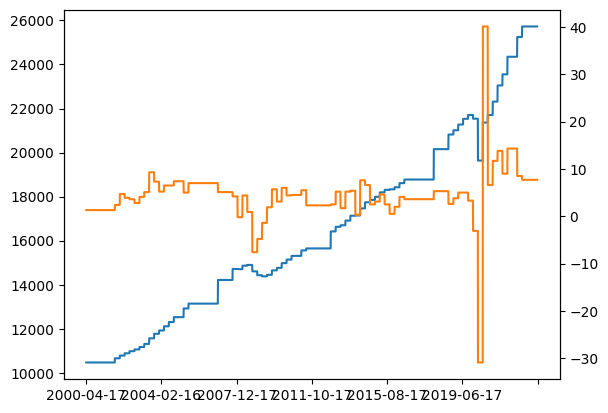

In [170]:
df_gdp["GDP"].plot()
df_gdp["GDP Growth"].plot(secondary_y="GDP Growth")